In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.linear_model import ElasticNetCV
from sklearn.ensemble import BaggingRegressor
from sklearn import preprocessing, cross_validation
from scipy.stats.stats import pearsonr
from numpy import inf, nan, log10

from glob import glob 
import pandas

In [3]:
# clean up data for sklearn
x_cols = [ 
    u'total_score', u'fa_rep', u'hbond_sc', u'tot_pstat_pm',
    u'tot_nlpstat_pm', u'tot_burunsat_pm', u'tot_hbond_pm',
    u'tot_NLconts_pm', u'tot_nlsurfaceE_pm', u'tot_total_charge',
    u'SR_1_total_score', u'SR_1_fa_rep', u'SR_1_hbond_sc',
    u'SR_1_hbond_pm', u'SR_1_burunsat_pm',
    u'SR_1_pstat_pm', u'SR_1_nlpstat_pm', u'SR_2_total_score',
    u'SR_2_fa_rep', u'SR_2_hbond_sc', u'SR_2_hbond_pm',
    u'SR_2_burunsat_pm', u'SR_2_pstat_pm', u'SR_2_nlpstat_pm',
    u'SR_3_total_score', u'SR_3_fa_rep', u'SR_3_hbond_sc', 
    u'SR_3_hbond_pm', u'SR_3_burunsat_pm', u'SR_3_pstat_pm',
    u'SR_3_nlpstat_pm', u'SR_4_total_score', u'SR_4_fa_rep',
    u'SR_4_hbond_sc', u'SR_4_hbond_pm',
    u'SR_4_burunsat_pm', u'SR_4_pstat_pm', u'SR_4_nlpstat_pm',
    u'SR_5_total_score', u'SR_5_fa_rep', u'SR_5_hbond_sc', 
    u'SR_5_interf_E_1_2', u'SR_5_dsasa_1_2', u'SR_5_hbond_pm',
    u'SR_5_burunsat_pm', 
]

constants = [ 'kcat', 'km', 'kcatkm' ]

In [7]:
f = pandas.read_csv( '../data_sets/rosetta/enzyme_design_noncovalent_2.csv' )
f = f.groupby( 'description' ).apply( lambda x: x.sort_values( 'total_score' ).head( 10 ).mean() )

df = pandas.read_csv( '../data_sets/experimental/bglb_all.csv', index_col=0 )
df[ 'kcat' ] = log10( df.kcat / 880 ) 
df[ 'kcat' ] = log10( df.km / 5 )
df[ 'kcatkm' ] = log10( df.kcatkm / 174000 )

joined = df.join( f ) 

In [5]:
#f[x_cols].hist(figsize=(10,10))

[[ 0.04419148  0.01386519  0.25861538 ...,  0.75510204  0.83333333
   0.44077587]
 [ 0.00539912  0.00979655  0.31184615 ...,  0.71428571  0.83333333
   0.62290406]
 [ 0.00539912  0.00979655  0.31184615 ...,  0.71428571  0.83333333
   0.62290406]
 ..., 
 [ 0.00824233  0.00346973  0.16230769 ...,  0.81632653  0.83333333
   0.43698983]
 [ 0.00353693  0.00951182  0.344      ...,  0.71428571  0.83333333
   0.46898989]
 [ 0.00353693  0.00951182  0.344      ...,  0.71428571  0.83333333
   0.46898989]]
(116, 45)
(116,)


/usr/local/bin/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
/usr/local/bin/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
/usr/local/bin/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
/usr/local/bin/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
/usr/local/bin/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceW

[[ 0.04419148  0.01386519  0.25861538 ...,  0.75510204  0.83333333
   0.03666927]
 [ 0.00539912  0.00979655  0.31184615 ...,  0.71428571  0.83333333
   0.11071149]
 [ 0.00539912  0.00979655  0.31184615 ...,  0.71428571  0.83333333
   0.11071149]
 ..., 
 [ 0.00824233  0.00346973  0.16230769 ...,  0.81632653  0.83333333
   0.03580923]
 [ 0.00353693  0.00951182  0.344      ...,  0.71428571  0.83333333
   0.04370602]
 [ 0.00353693  0.00951182  0.344      ...,  0.71428571  0.83333333
   0.04370602]]
(116, 45)
(116,)


/usr/local/bin/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
/usr/local/bin/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
/usr/local/bin/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
/usr/local/bin/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
/usr/local/bin/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceW

[[ 0.04419148  0.01531149  0.25861538 ...,  0.75510204  0.83333333
   0.82163979]
 [ 0.00539912  0.01124882  0.31184615 ...,  0.71428571  0.83333333
   0.67687694]
 [ 0.00539912  0.01124882  0.31184615 ...,  0.71428571  0.83333333
   0.67687694]
 ..., 
 [ 0.00353693  0.01096451  0.344      ...,  0.71428571  0.83333333
   0.78697152]
 [ 0.00353693  0.01096451  0.344      ...,  0.71428571  0.83333333
   0.78697152]
 [ 0.01375006  0.0100959   0.65784615 ...,  0.28571429  0.25        0.        ]]
(113, 45)
(113,)


/usr/local/bin/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
/usr/local/bin/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
/usr/local/bin/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
/usr/local/bin/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
/usr/local/bin/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceW

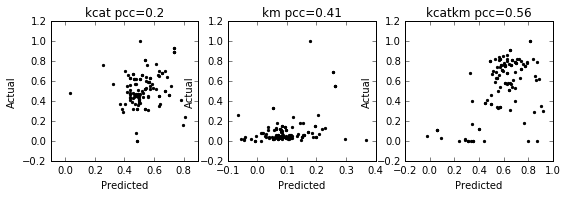

In [8]:
plt.figure( figsize=( 9, 2.5 ) ) 

for i, constant in enumerate( constants ):
    work = joined[ x_cols + [ constant ] ]
    work = work.replace( [ inf, -inf ], nan ).dropna()

    scaler = preprocessing.StandardScaler()
    min_max_scaler = preprocessing.MinMaxScaler()
    #J = scaler.fit_transform( work ) 
    J = min_max_scaler.fit_transform( work ) 

    print J 

    X = J[:, :-1]
    y = J[:, -1:].ravel()

    print X.shape
    print y.shape 

    l1_ratio = [ .5] # [ .1, .5, .7, .9, .95, .99, 1 ]

    net = ElasticNetCV( l1_ratio=l1_ratio )
    bag = BaggingRegressor( net, n_estimators=30, n_jobs=-1, oob_score=True )
    preds = cross_validation.cross_val_predict( bag, X, y, cv=10 ) 

    plt.subplot( 1, 3, i + 1 ) 
    plt.scatter( preds, y, marker='.', color='k' )
    plt.xlabel( 'Predicted' ); plt.ylabel( 'Actual' )
    r = pearsonr( preds, y )[0].round(2)
    plt.title( '{} pcc={}'.format( constant, r ) ) 

In [9]:
f = pandas.read_csv( '../data_sets/rosetta/enzyme_design_talaris_2013.csv' )
f = f.groupby( 'name' ).apply( lambda x: x.sort_values( 'SR_5_fa_rep' ).head( 10 ).mean() )

df = pandas.read_csv( '../data_sets/experimental/thermo_paper_data_set.csv', index_col=0 )
df[ 'kcat' ] = log10( df.kcat / 880 ) 
df[ 'kcat' ] = log10( df.km / 5 )
df[ 'kcatkm' ] = log10( df.kcatkm / 174000 )

joined = df.join( f ) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1154c1890>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11900e710>]], dtype=object)

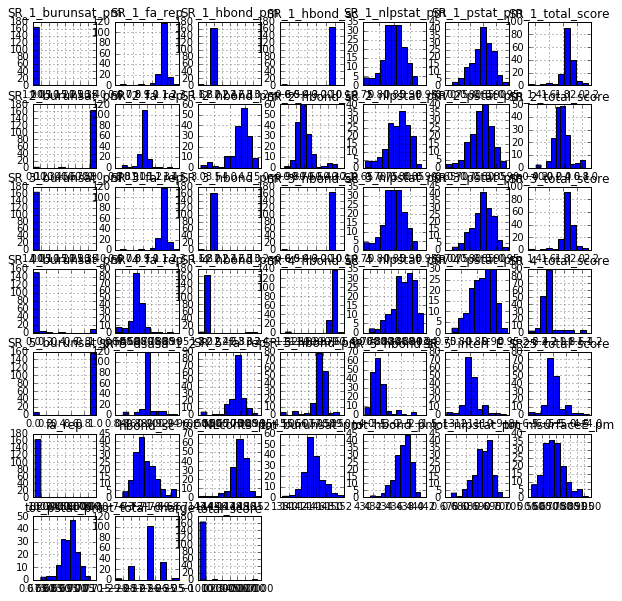

In [10]:
f[x_cols].hist(figsize=(10,10))

(77, 45)
(77,)


/usr/local/bin/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


(77, 45)
(77,)
(86, 45)
(86,)


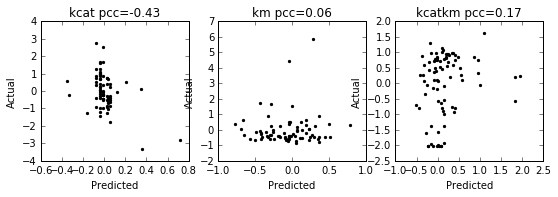

In [11]:
plt.figure( figsize=( 9, 2.5 ) ) 

for i, constant in enumerate( constants ):
    work = joined[ x_cols + [ constant ] ]
    work = work.replace( [ inf, -inf ], nan ).dropna()

    scaler = preprocessing.StandardScaler()
    J = scaler.fit_transform( work ) 

    X = J[:, :-1]
    y = J[:, -1:].ravel()

    print X.shape
    print y.shape 

    l1_ratio = [ .1, .5, .7, .9, .95, .99, 1 ]

    net = ElasticNetCV( l1_ratio=l1_ratio )
    preds = cross_validation.cross_val_predict( net, X, y, cv=10 ) 

    plt.subplot( 1, 3, i + 1 ) 
    plt.scatter( preds, y, marker='.', color='k' )
    plt.xlabel( 'Predicted' ); plt.ylabel( 'Actual' )
    r = pearsonr( preds, y )[0].round(2)
    plt.title( '{} pcc={}'.format( constant, r ) ) 

In [12]:
# try with Xiaokang's results

%matplotlib inline 
import matplotlib.pyplot as plt 
import pandas 

df = pandas.read_csv( '/Users/alex/Desktop/xiaokang_pred_results_complete.csv' ) 

In [13]:
features = [ 
    u'total_score', u'fa_rep', u'hbond_sc', u'tot_pstat_pm',
    u'tot_nlpstat_pm', u'tot_burunsat_pm', u'tot_hbond_pm',
    u'tot_NLconts_pm', u'tot_nlsurfaceE_pm', u'tot_total_charge',
    u'SR_1_total_score', u'SR_1_fa_rep', u'SR_1_hbond_sc',
    u'SR_1_hbond_pm', u'SR_1_burunsat_pm',
    u'SR_1_pstat_pm', u'SR_1_nlpstat_pm', u'SR_2_total_score',
    u'SR_2_fa_rep', u'SR_2_hbond_sc', u'SR_2_hbond_pm',
    u'SR_2_burunsat_pm', u'SR_2_pstat_pm', u'SR_2_nlpstat_pm',
    u'SR_3_total_score', u'SR_3_fa_rep', u'SR_3_hbond_sc', 
    u'SR_3_hbond_pm', u'SR_3_burunsat_pm', u'SR_3_pstat_pm',
    u'SR_3_nlpstat_pm', u'SR_4_total_score', u'SR_4_fa_rep',
    u'SR_4_hbond_sc', u'SR_4_hbond_pm',
    u'SR_4_burunsat_pm', u'SR_4_pstat_pm', u'SR_4_nlpstat_pm',
    u'SR_5_total_score', u'SR_5_fa_rep', u'SR_5_hbond_sc', 
    u'SR_5_interf_E_1_2', u'SR_5_dsasa_1_2', u'SR_5_hbond_pm',
    u'SR_5_burunsat_pm', 
]

constants = [ 'kcat', 'km', 'kcatkm' ]

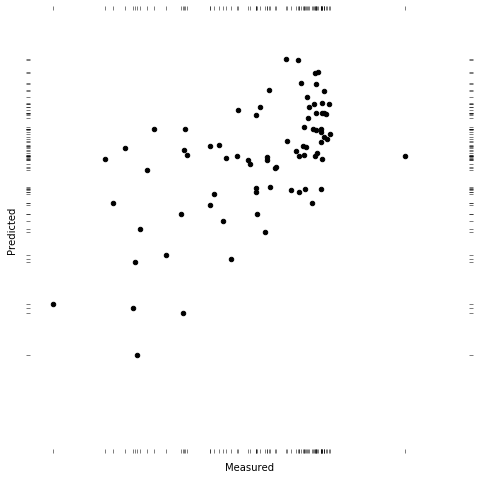

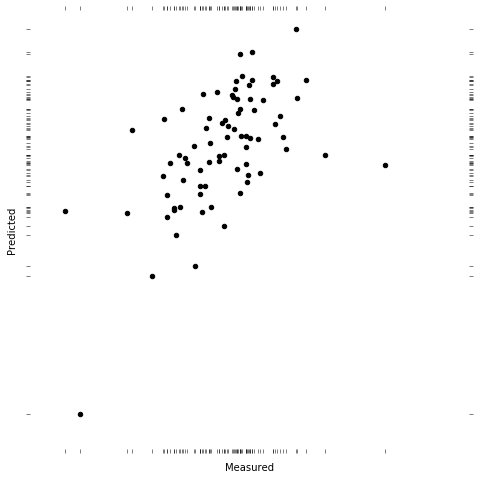

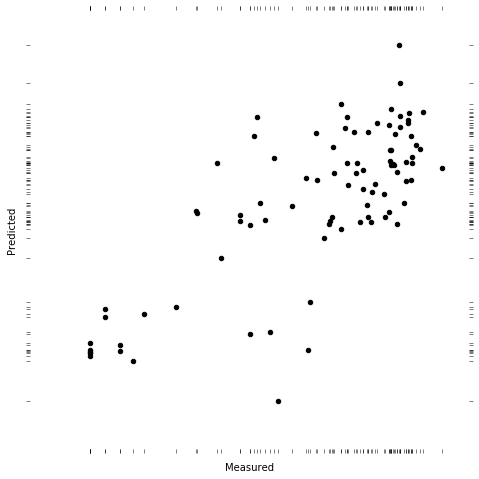

In [14]:
for constant in constants:

    my_measured = 'measured_{}'.format( constant )
    my_pred = 'predicted_{}'.format( constant )
    
    plt.figure( figsize=( 8,8 ) ) 
    plt.scatter( df[ my_measured ], df[ my_pred ], c='k' )
    plt.xlabel( 'Measured' ); plt.ylabel( 'Predicted' )

    plt.xticks( df[ my_measured ].dropna(), ('') )
    plt.yticks( df[ my_pred ].dropna(), ('') )
    
    plt.box( 0 ) 
    plt.show()

In [15]:
plt.axes().yaxis.

SyntaxError: invalid syntax (<ipython-input-15-c82309b4b8f7>, line 1)

In [ ]:
# see if we can replicate 

In [ ]:
for constant in constants:

    my_measured = 'measured_{}'.format( constant )
    my_pred = 'predicted_{}'.format( constant )
    
    plt.figure( figsize=( 8,8 ) ) 
    plt.scatter( df[ my_measured ], df[ my_pred ], c='k' )
    plt.xlabel( 'Measured' ); plt.ylabel( 'Predicted' )

    plt.xticks( df[ my_measured ].dropna(), ('') )
    plt.yticks( df[ my_pred ].dropna(), ('') )
    plt.xticks( (0,), ('zro') )

    plt.box( 0 ) 
    plt.show()